In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px


from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.preprocessing import StandardScaler 


import warnings
warnings.filterwarnings("ignore")

In [ ]:
car_data = pd.read_csv("Data/cardata.csv")

In [68]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


* **Columns & Unique values**

In [69]:
pd.concat({"Columns" : car_data.apply(pd.unique) ,
             "Values" : car_data.nunique()} , axis=1)

,Columns,Values
Car_Name,"[ritz, sx4, ciaz, wagon r, swift, vitara brezz...",98
Year,"[2014, 2013, 2017, 2011, 2018, 2015, 2016, 200...",16
Selling_Price,"[3.35, 4.75, 7.25, 2.85, 4.6, 9.25, 6.75, 6.5,...",156
Present_Price,"[5.59, 9.54, 9.85, 4.15, 6.87, 9.83, 8.12, 8.6...",147
Kms_Driven,"[27000, 43000, 6900, 5200, 42450, 2071, 18796,...",206
Fuel_Type,"[Petrol, Diesel, CNG]",3
Seller_Type,"[Dealer, Individual]",2
Transmission,"[Manual, Automatic]",2
Owner,"[0, 1, 3]",3


In [70]:
car_data.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [71]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [72]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


* **Nan Values**

In [73]:
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

* **Dublicated Values**

In [74]:
car_data.duplicated().sum()

np.int64(2)

In [75]:
car_data[car_data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [76]:
car_data.drop_duplicates(inplace=True)

In [77]:
car_data.reset_index(drop=True , inplace=True)

* **Object Columns**

In [78]:
car_data.select_dtypes("object")

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
294,city,Diesel,Dealer,Manual
295,brio,Petrol,Dealer,Manual
296,city,Petrol,Dealer,Manual
297,city,Diesel,Dealer,Manual


* **Numeric Columns**

In [79]:
car_data.select_dtypes(["int" , "float"])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
294,2016,9.50,11.60,33988,0
295,2015,4.00,5.90,60000,0
296,2009,3.35,11.00,87934,0
297,2017,11.50,12.50,9000,0


* **Year Colums Convert to Age**

In [80]:
car_data["Age"] = 2025 - car_data["Year"] 
car_data.drop("Year" , axis=1 , inplace=True)

* **Km Driver convert to Km**

In [81]:
car_data.rename(columns={"Kms_Driven" : "Km"} , inplace=True)

* **Car Name**

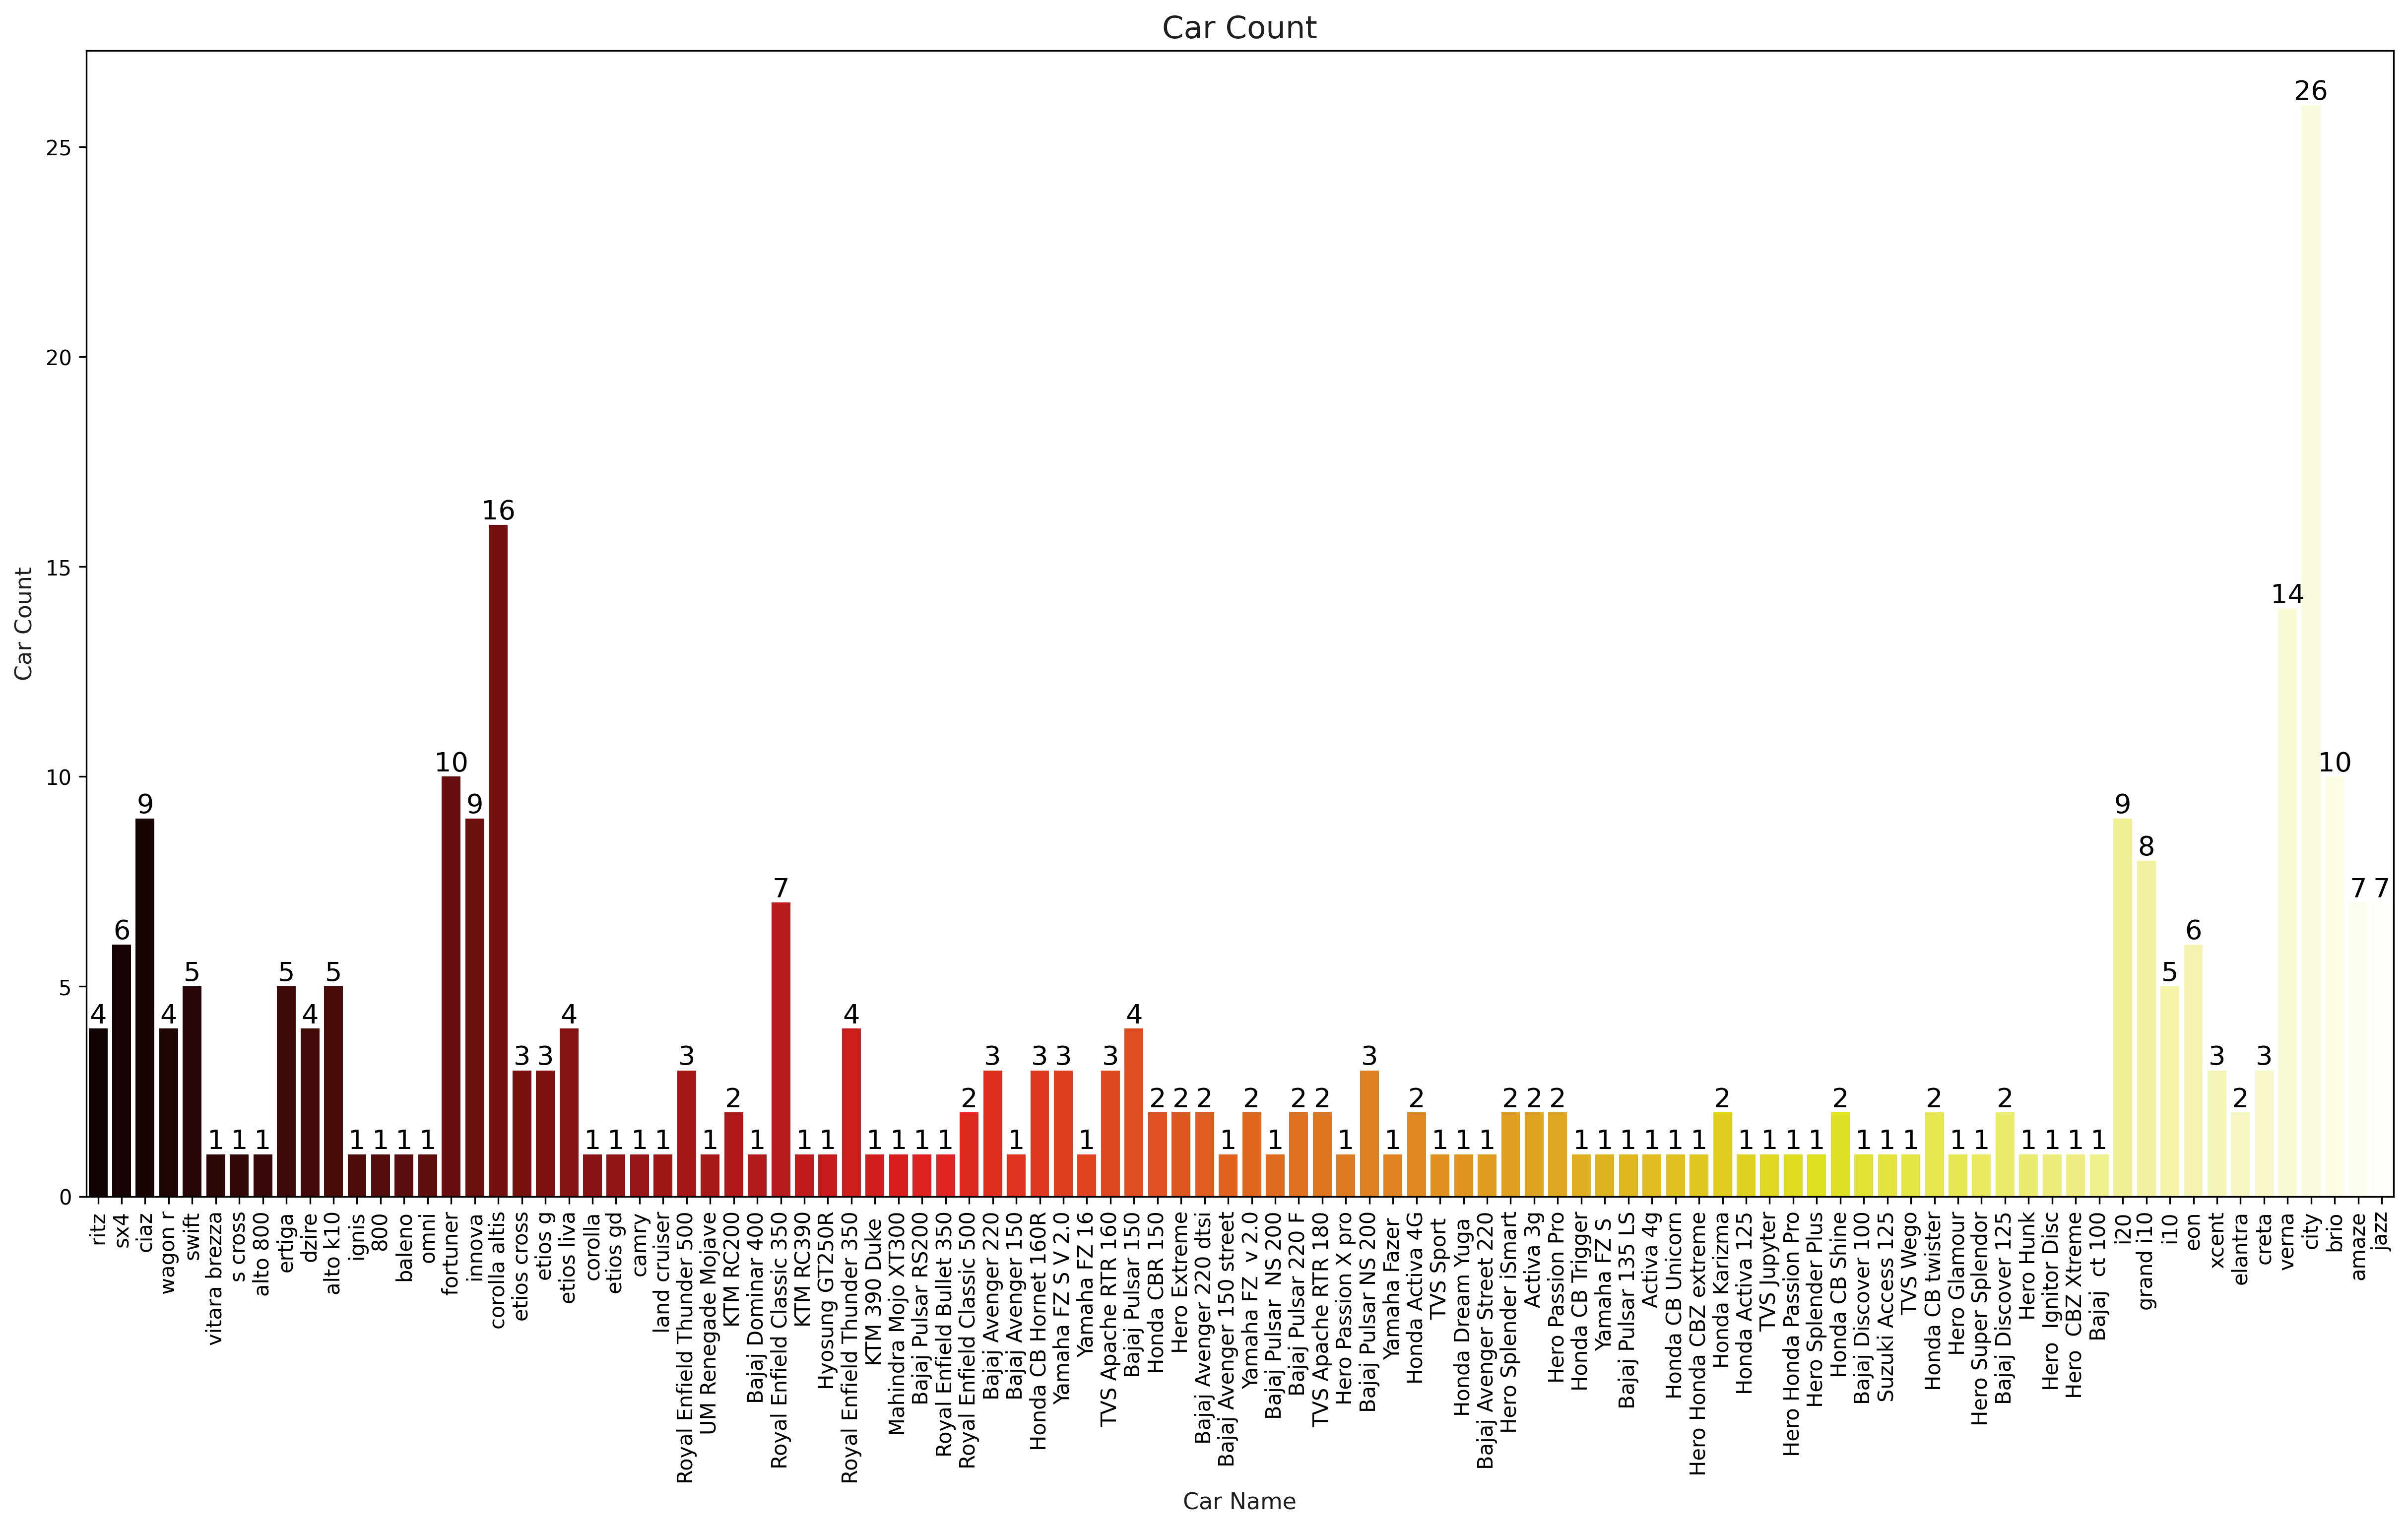

In [82]:
plt.figure(figsize=(20,10) , dpi=300)

ax = sns.countplot(x="Car_Name" , data=car_data , palette="hot")

for bar in ax.containers:
    ax.bar_label(bar , label_type="edge" , color = "black" , size=13)

plt.title("Car Count" , size = 15 , color = "#1E201E")
plt.ylabel("Car Count" , size = 11 , color = "#1E201E")
plt.xlabel("Car Name" , size = 11 ,color = "#1E201E" )
plt.xticks(rotation=90)
plt.show()

* **Drop The Car Name**

In [83]:
car_data.drop("Car_Name" , axis=1 , inplace=True)

#### EDA

* **Object Columns**

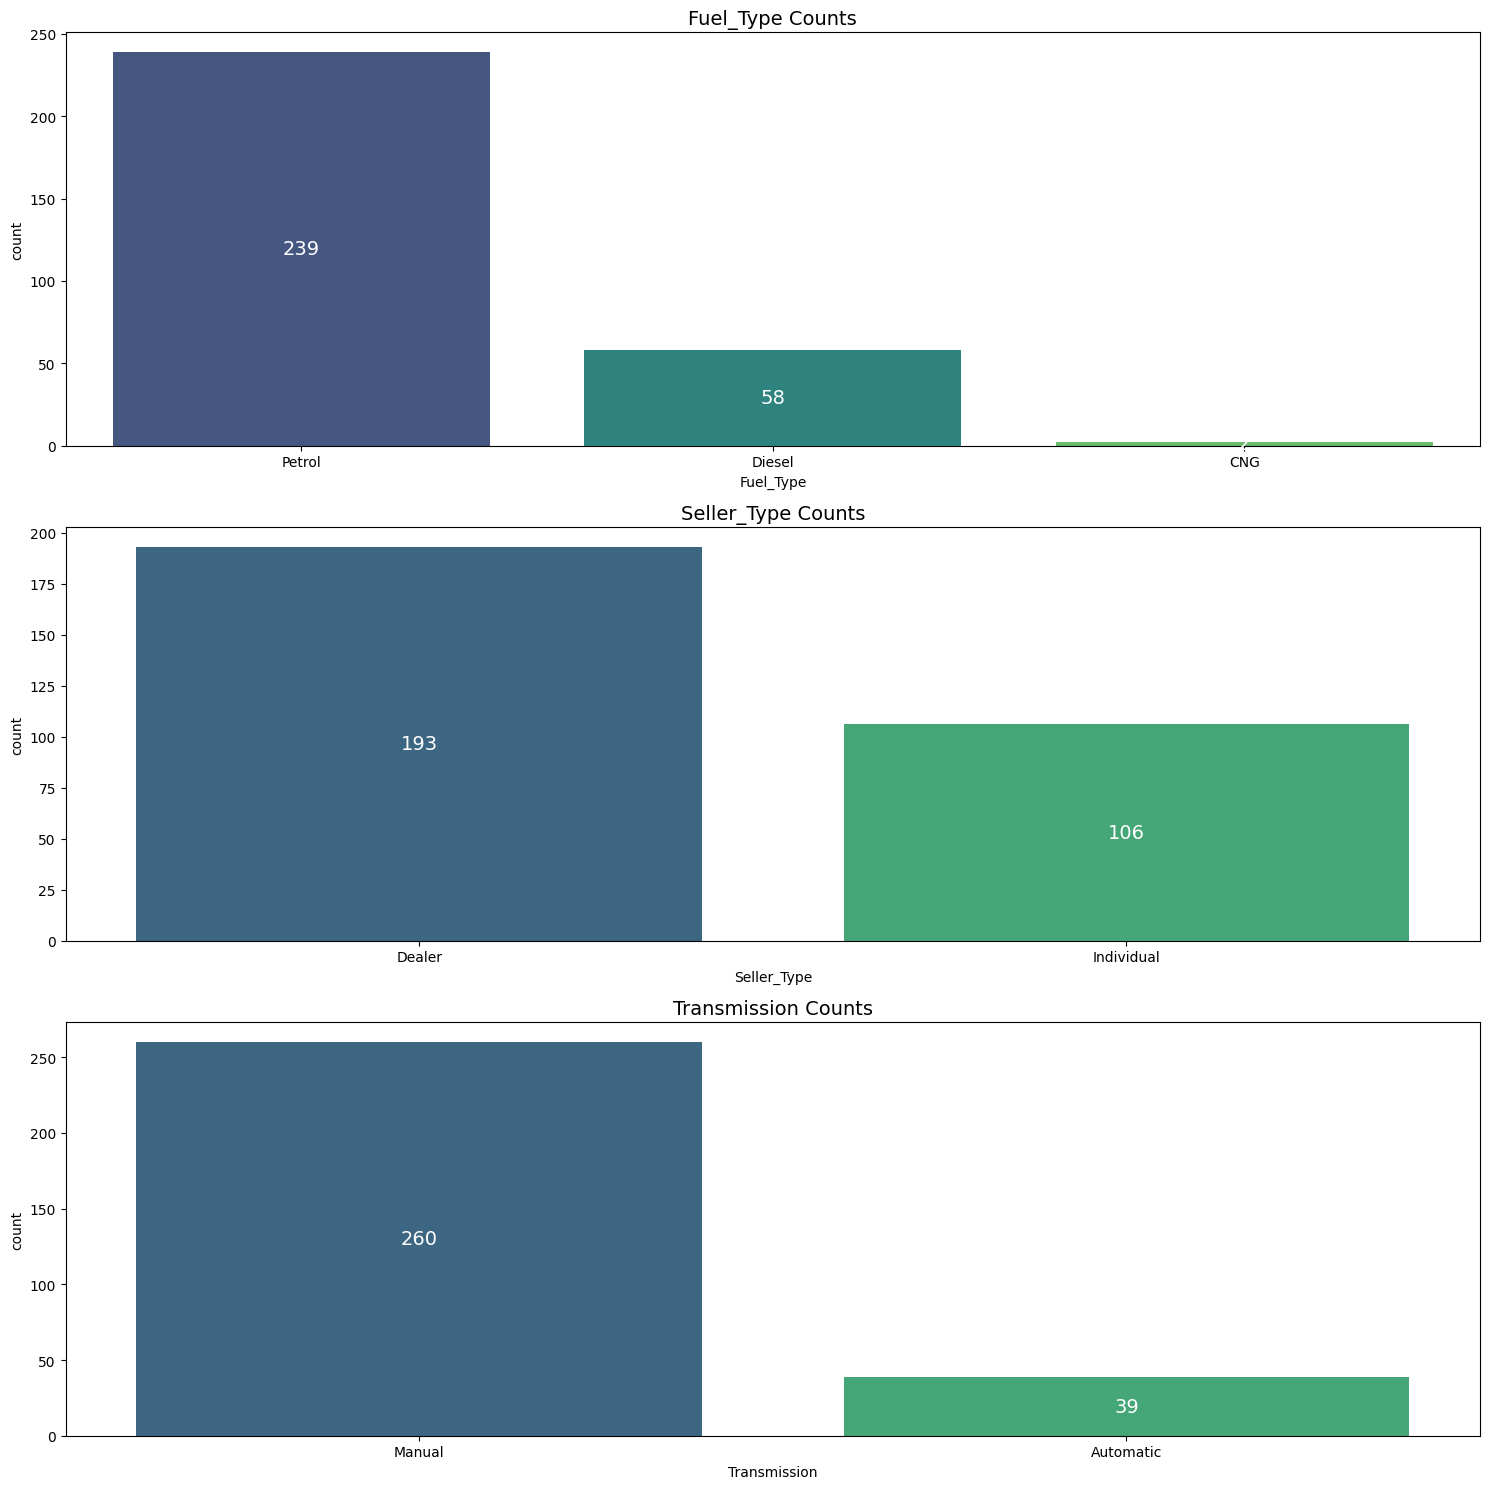

In [84]:
object_columns = car_data[["Fuel_Type" ,	"Seller_Type"	, "Transmission"]]

def cotegorical_grafic(data , palette):
    plt.figure(figsize=(15,15))

    for i , column in enumerate(object_columns):
        plt.subplot(3,1 , i+1)

        ax = sns.countplot(x=column , data= data , palette= palette)

        for bar in ax.containers:
            ax.bar_label(bar , label_type="center" , color = "white" , size = 14)
        
        plt.title(f"{column} Counts" , size = 14)


    plt.tight_layout()
    plt.show()


cotegorical_grafic(object_columns, palette= "viridis")

* **Car Age**

In [85]:
fig = px.pie(
    car_data , 
    names="Age" , 
    title="Age" ,
        color_discrete_sequence= px.colors.qualitative.Set3

)

fig.update_traces(textinfo="label + percent")

fig.update_layout(
    width = 900 , 
    height = 750
)

* **Selling Price & (Fuel Type , Seller Type , Transmission , Owner)**

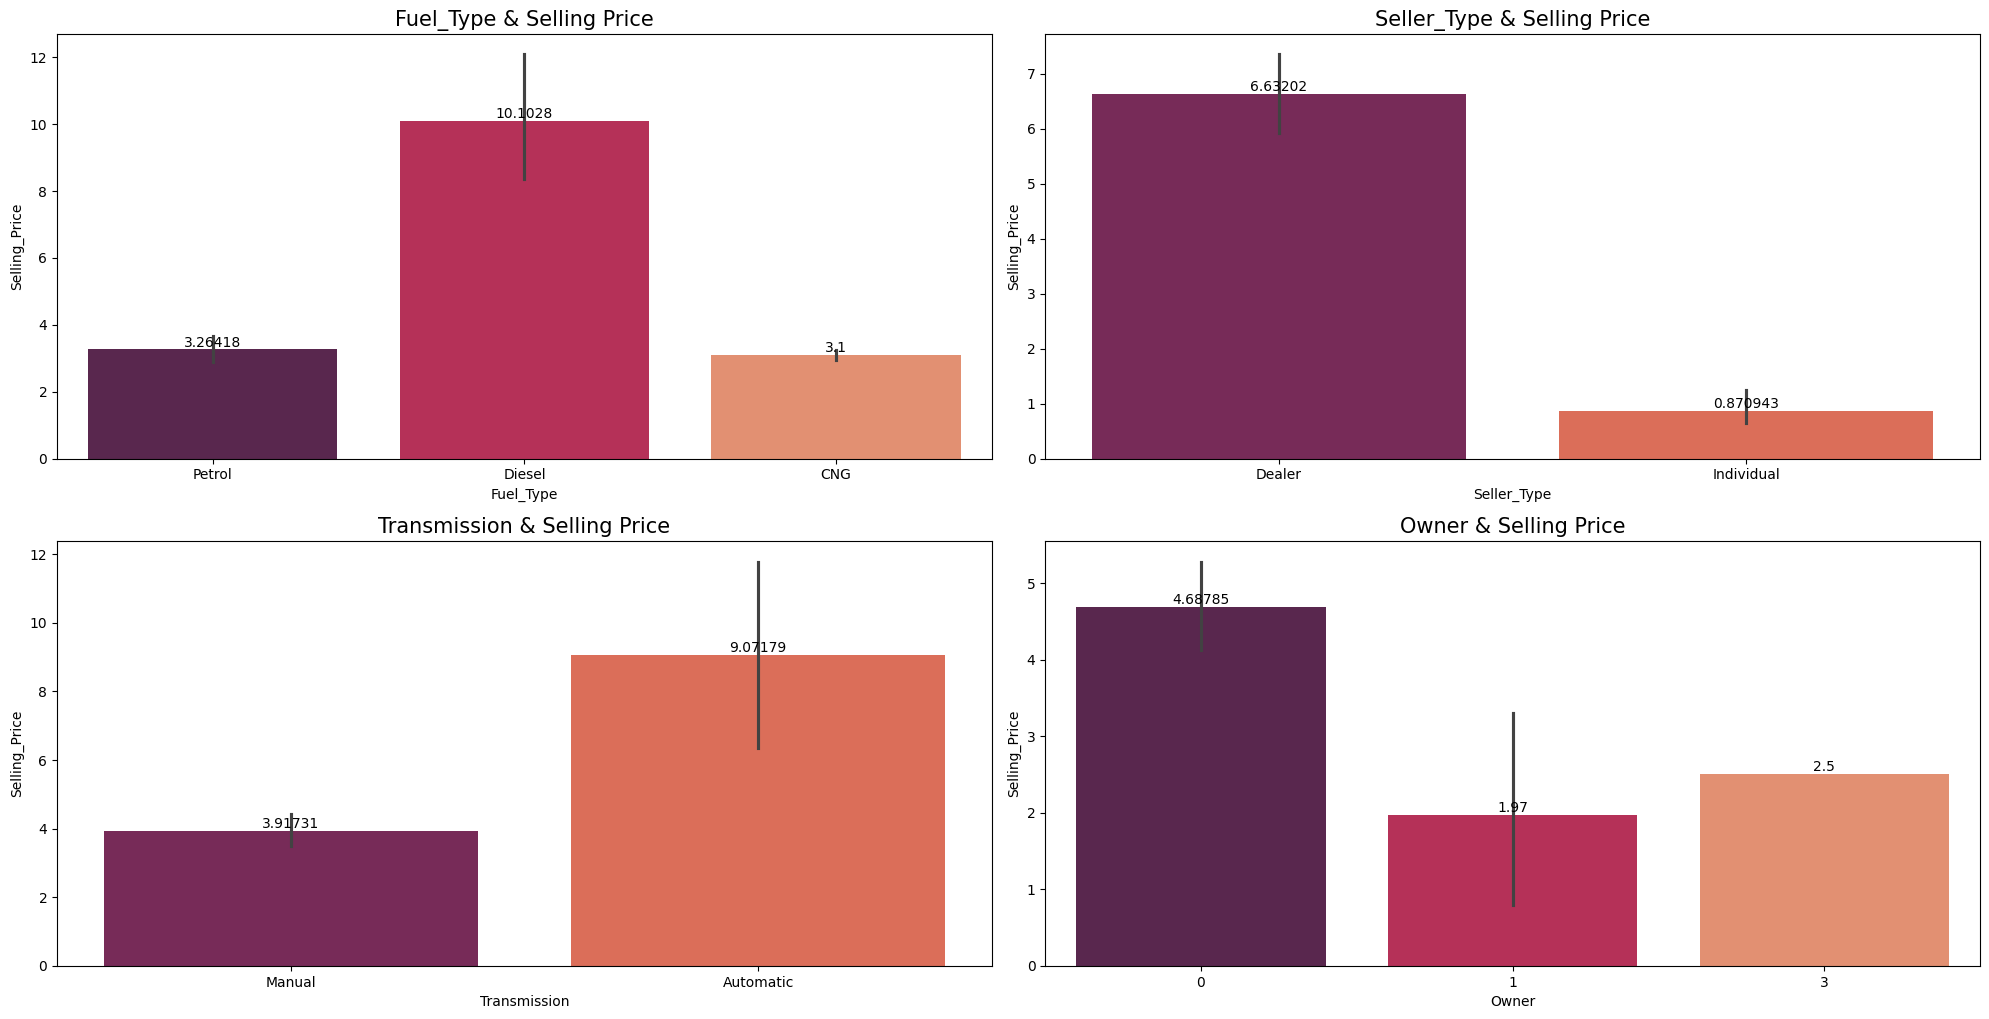

In [86]:
vs_selling_columns = car_data[["Fuel_Type","Seller_Type","Transmission","Owner"]]

def object_barplot_vs_selling(data):


    plt.figure(figsize=(20 , 20))

    for i , column in enumerate(vs_selling_columns):
        plt.subplot(4,2,i+1)


        ax = sns.barplot(data= data , palette="rocket" , x = column , y=car_data["Selling_Price"] )

        for bar in ax.containers:
            ax.bar_label(bar , label_type="edge" , color = "black")

        plt.title(f"{column} & Selling Price" , size = 15)

    plt.tight_layout()
    plt.show()

object_barplot_vs_selling(vs_selling_columns)

* **Selling Price & Km**

Text(0.5, 1.0, 'Km & Selling Price')

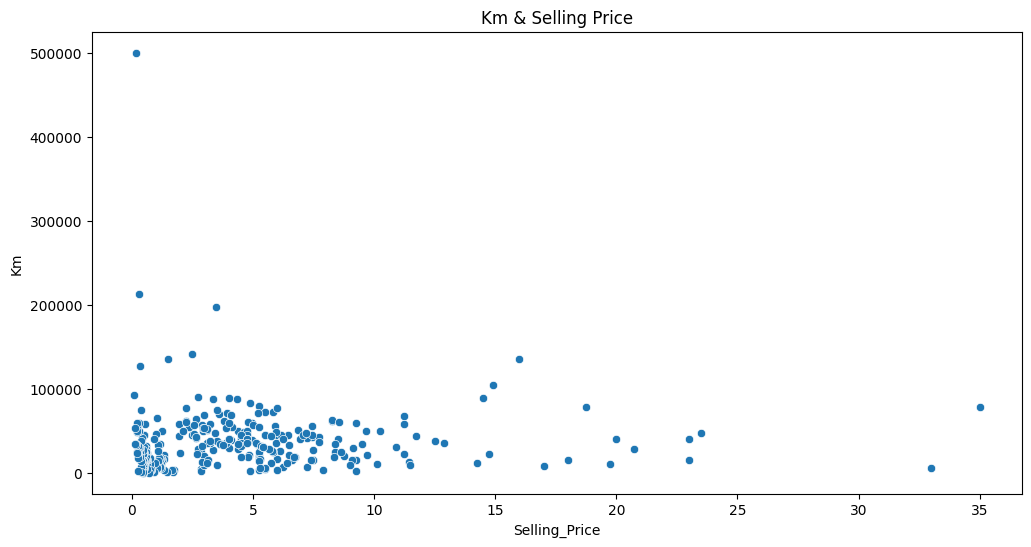

In [87]:
plt.figure(figsize=(12,6))
sns.scatterplot(y="Km" , x="Selling_Price" , data=car_data)
plt.title("Km & Selling Price")

* **Selling Price Histogram**

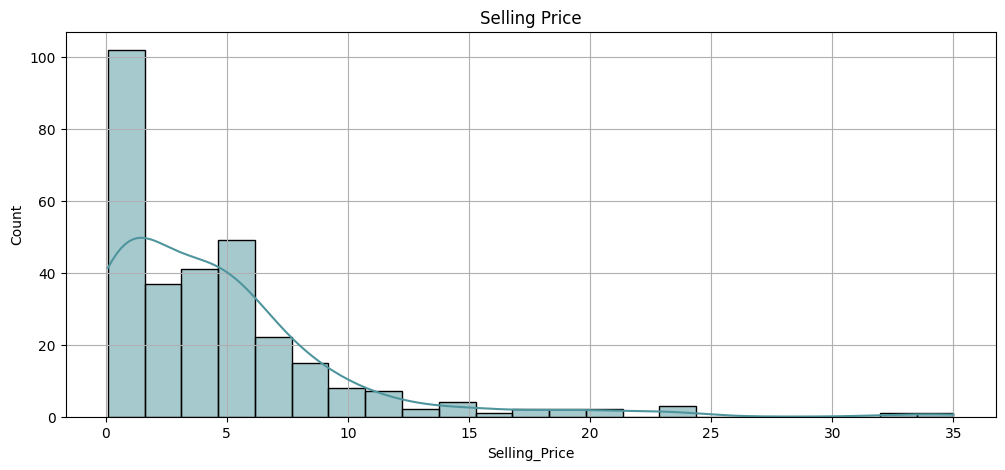

In [88]:
plt.figure(figsize=(12,5))
sns.histplot(x="Selling_Price" , data=car_data , color="#4F959D" 
             , kde=True )
plt.title("Selling Price")

plt.grid()
plt.show()

* **Selling Price & Age**

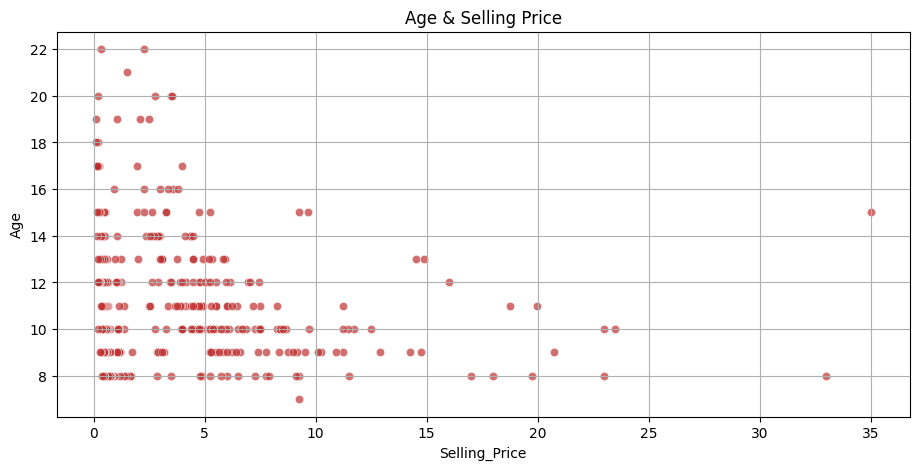

In [89]:
plt.figure(figsize=(11,5))
sns.scatterplot(x="Selling_Price", y="Age", data=car_data, alpha=.7 , color = "#BF3131")
plt.title("Age & Selling Price")
plt.grid()
plt.show()

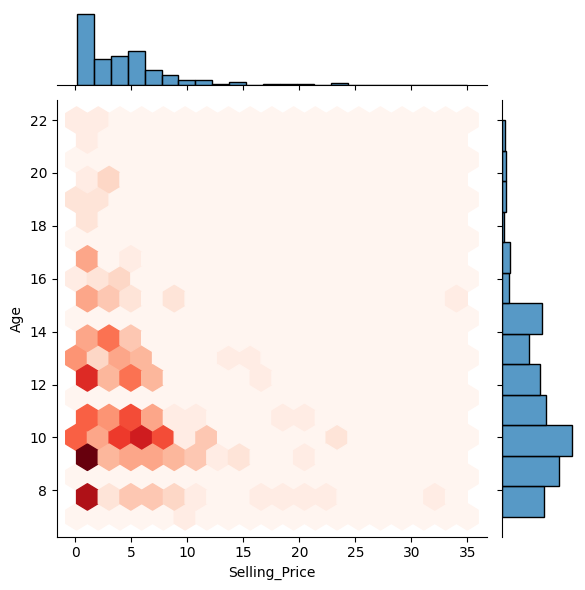

In [90]:
sns.jointplot(x="Selling_Price", y="Age", data=car_data, kind="hex", cmap="Reds")
plt.show() 

* **Pairplot**

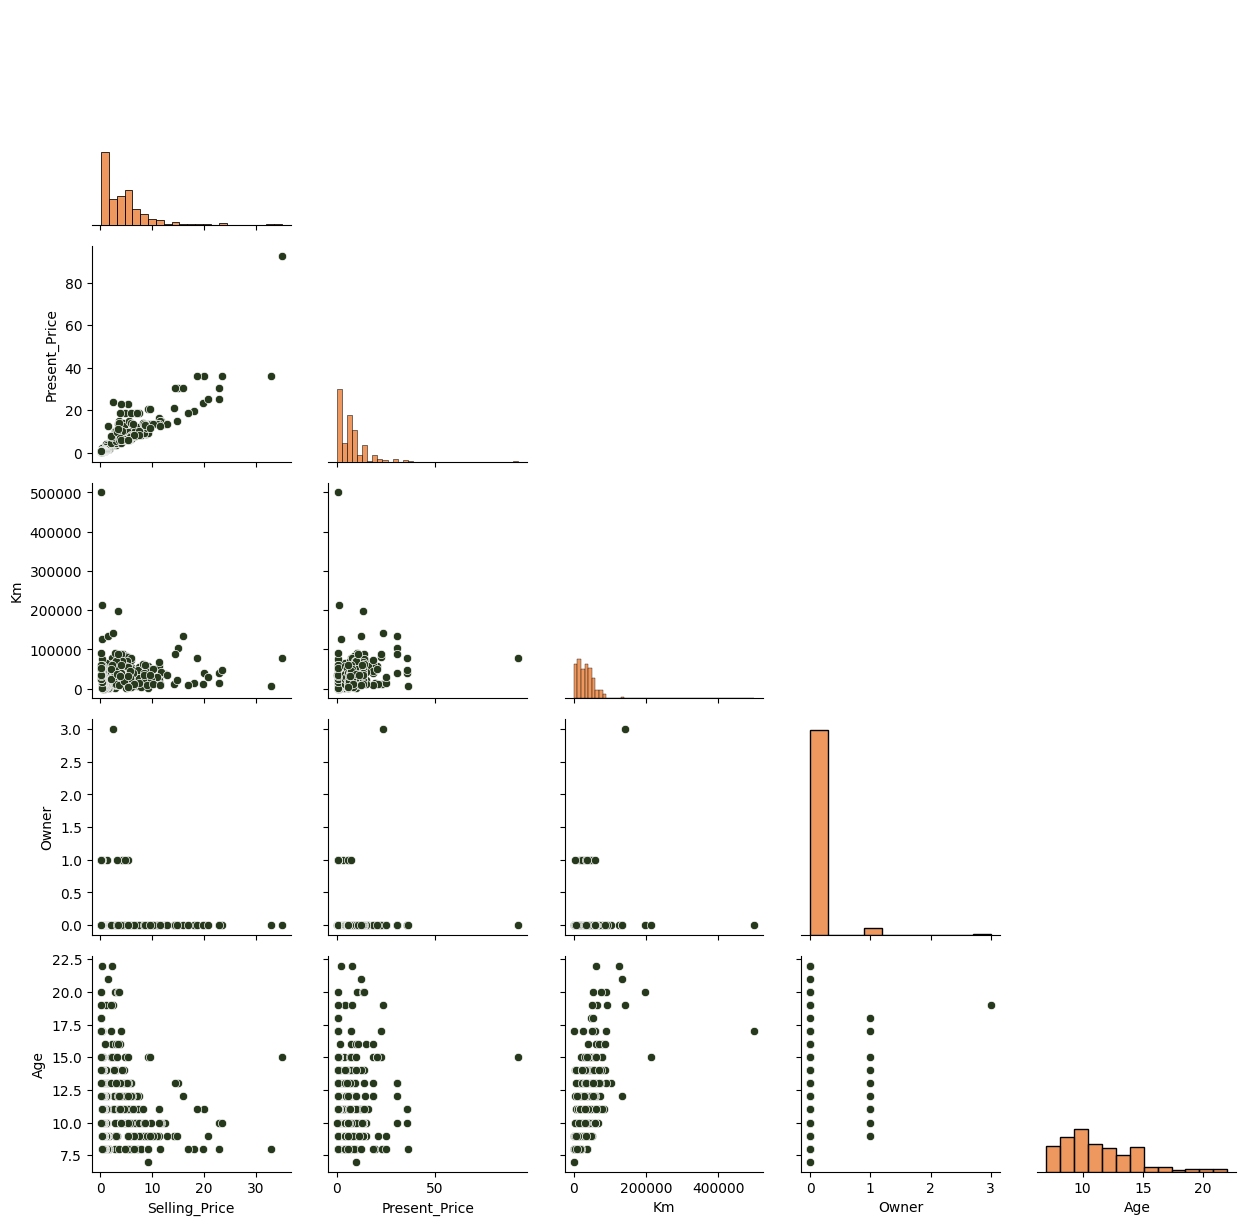

In [91]:
pairgrid = sns.PairGrid(car_data , corner=True)

pairgrid = pairgrid.map_diag(sns.histplot , color = "#E9762B")
pairgrid = pairgrid.map_lower(sns.scatterplot , color = "#27391C")

#### Label Encoding

In [92]:
from sklearn.preprocessing import LabelEncoder

label_encoding_values = {}

for i in car_data.select_dtypes("object"):
    label = LabelEncoder()
    car_data[i] = label.fit_transform(car_data[i])

    label_encoding_values[i] = label

In [93]:
for col , encod in label_encoding_values.items():
    print("--------------------")
    print(f"Column : {col}")
    

    for i , category in enumerate(encod.classes_):
        print(f"{category} : {i}")

--------------------
Column : Fuel_Type
CNG : 0
Diesel : 1
Petrol : 2
--------------------
Column : Seller_Type
Dealer : 0
Individual : 1
--------------------
Column : Transmission
Automatic : 0
Manual : 1


In [94]:
car_data.head(3)

,Selling_Price,Present_Price,Km,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8


* **X & y features**

In [95]:
y = car_data[["Selling_Price"]]
X = car_data.drop("Selling_Price" , axis=1)

In [96]:
y.head(3)

,Selling_Price
0,3.35
1,4.75
2,7.25


In [97]:
X.head(3)

,Present_Price,Km,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,2,0,1,0,11
1,9.54,43000,1,0,1,0,12
2,9.85,6900,2,0,1,0,8


* **Train Test Split**

In [98]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

* **Features Size**

In [99]:
print("X_train:" , X_train.shape)
print("X_test:" , X_test.shape)
print("y_train:" , y_train.shape)
print("y_test:" , X_test.shape)

X_train: (239, 7)
X_test: (60, 7)
y_train: (239, 1)
y_test: (60, 7)


* **Outlier**

In [100]:
for i in X_train.columns:
    q1 = X_train[i].quantile(0.10) 
    q3 = X_train[i].quantile(0.90)

    ıqr = q3 - q1 

    lower_border = q1 - 1.5 * ıqr
    upper_border = q3 + 1.5 * ıqr

    X_train = X_train[(X_train[i] >= lower_border) & (X_train[i] <= upper_border)]
    y_train = y_train.loc[X_train.index]

* **New Size**

In [101]:
print("X_train:" , X_train.shape)
print("X_test:" , X_test.shape)
print("y_train:" , y_train.shape)
print("y_test:" , X_test.shape)

X_train: (226, 7)
X_test: (60, 7)
y_train: (226, 1)
y_test: (60, 7)


* **Scaling**

In [102]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# convert  np array data to df

X_train_scaler = pd.DataFrame(X_train_scaler , columns=X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler , columns=X_test.columns)


In [103]:
X_test_scaler.head(2)

,Present_Price,Km,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0.811200,-1.004051,0.457338,-0.725966,0.376051,0.0,-0.783681
1,0.419695,-0.559813,-2.063596,-0.725966,0.376051,0.0,-0.783681


In [104]:
X_train_scaler.head(2)

,Present_Price,Km,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0.210892,-0.587003,0.457338,-0.725966,0.376051,0.0,-0.425155
1,-1.019088,-1.307057,0.457338,1.377474,-2.659216,0.0,2.084528


#### Model Build

--------------- Intercept & Coef ---------------
Intercept: [6.82653784]
Coef: [[ 5.89034088e-01 -2.52868289e-05 -1.01677814e+00 -5.19936607e-01
  -6.63725163e-01  0.00000000e+00 -2.73214150e-01]]

------------ Predicts Metrics ------------

Mean Squared Error: 8.09
Mean Absolute Error: 1.58
Root Mean Squared Error: 2.84
R2 Score: 69.0

-------------- Sale Prices & Predict -------------


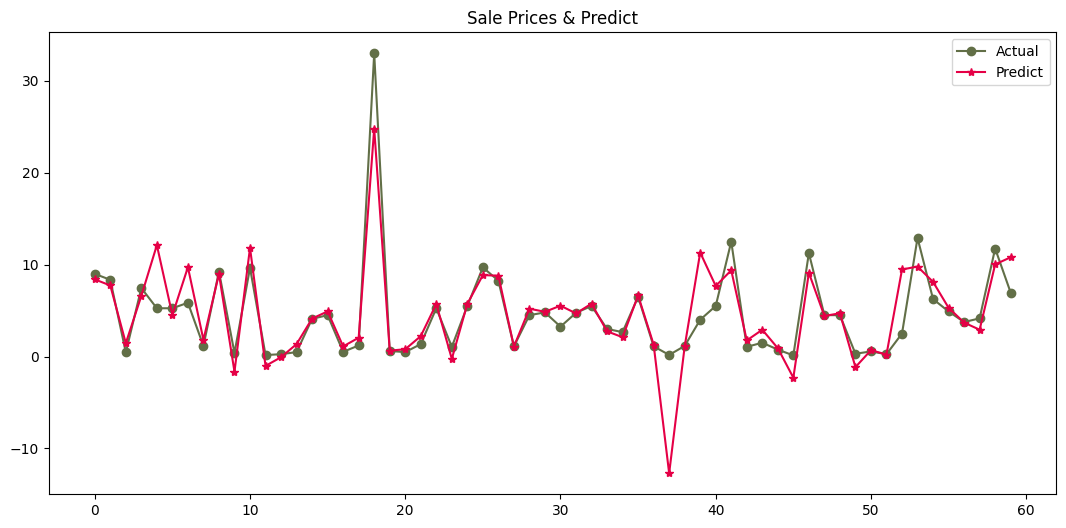

In [105]:
model = LinearRegression()

# training
model.fit(X_train , y_train)
# predict 
y_pred = model.predict(X_test)


print("--------------- Intercept & Coef ---------------")
print("Intercept:", model.intercept_)
print("Coef:", model.coef_)
print("")


print("------------ Predicts Metrics ------------")
print("Mean Squared Error:",round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error:",round(mean_absolute_error(y_test, y_pred),2))
print("Root Mean Squared Error:",round( np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 Score:", round(r2_score(y_test, y_pred),2)*100)
print("")

print("-------------- Sale Prices & Predict -------------")

index = np.arange(len(y_test))

fig, ax = plt.subplots(figsize=(13,6))
ax.plot(index, y_test, label="Actual", marker="o", markersize=6, color="#626F47")
ax.plot(index, y_pred, label="Predict", marker="*", markersize=6, color="#E50046")

plt.title("Sale Prices & Predict")
plt.legend()
plt.show()

* **Scaling**

--------------- Intercept & Coef ---------------
Intercept: [4.35823009]
Coef: [[ 3.61088579 -0.5933526  -0.40333392 -0.24718386 -0.21867113  0.
  -0.76204822]]

------------ Predicts Metrics ------------

Mean Squared Error: 8.09
Mean Absolute Error: 1.58
Root Mean Squared Error: 2.84
R2 Score: 69.0

-------------- Sale Prices & Predict -------------


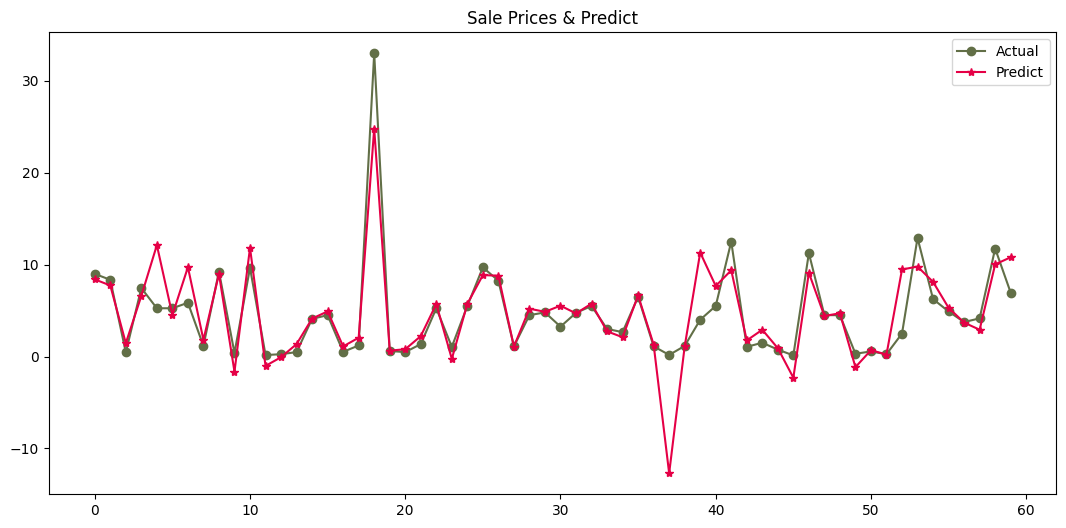

In [106]:
model = LinearRegression()

# training
model.fit(X_train_scaler , y_train)
# predict 
y_pred = model.predict(X_test_scaler)


print("--------------- Intercept & Coef ---------------")
print("Intercept:", model.intercept_)
print("Coef:", model.coef_)
print("")


print("------------ Predicts Metrics ------------")
print("Mean Squared Error:",round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error:",round(mean_absolute_error(y_test, y_pred),2))
print("Root Mean Squared Error:",round( np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 Score:", round(r2_score(y_test, y_pred),2)*100)
print("")

print("-------------- Sale Prices & Predict -------------")

index = np.arange(len(y_test))

fig, ax = plt.subplots(figsize=(13,6))
ax.plot(index, y_test, label="Actual", marker="o", markersize=6, color="#626F47")
ax.plot(index, y_pred, label="Predict", marker="*", markersize=6, color="#E50046")

plt.title("Sale Prices & Predict")
plt.legend()
plt.show()

* **Test Size .2 --> .3**

In [107]:
# New train size
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)



for i in X_train.columns:
    q1 = X_train[i].quantile(0.10) 
    q3 = X_train[i].quantile(0.90)

    ıqr = q3 - q1 

    lower_border = q1 - 1.5 * ıqr
    upper_border = q3 + 1.5 * ıqr

    X_train = X_train[(X_train[i] >= lower_border) & (X_train[i] <= upper_border)]
    y_train = y_train.loc[X_train.index]




scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# convert  np array data to df

X_train_scaler = pd.DataFrame(X_train_scaler , columns=X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler , columns=X_test.columns)


--------------- Intercept & Coef ---------------
Intercept: [4.34994898]
Coef: [[ 3.6624787  -0.6149621  -0.37227603 -0.17660411 -0.22257957  0.
  -0.72811647]]

------------ Predicts Metrics ------------

Mean Squared Error: 6.66
Mean Absolute Error: 1.46
Root Mean Squared Error: 2.58
R2 Score: 71.0

-------------- Sale Prices & Predict -------------


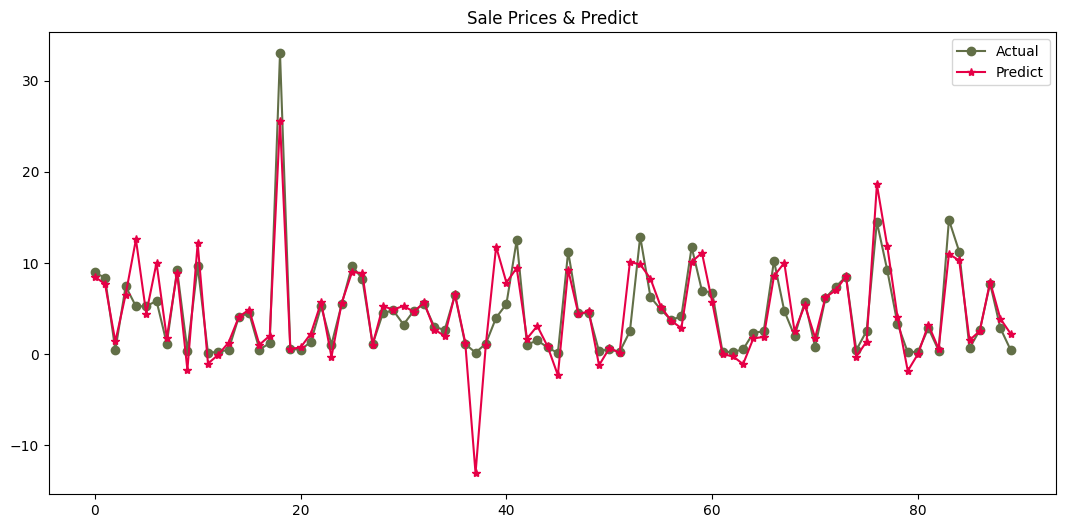

In [108]:
model = LinearRegression()

# training
model.fit(X_train_scaler , y_train)
# predict 
y_pred = model.predict(X_test_scaler)


print("--------------- Intercept & Coef ---------------")
print("Intercept:", model.intercept_)
print("Coef:", model.coef_)
print("")


print("------------ Predicts Metrics ------------")
print("Mean Squared Error:",round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error:",round(mean_absolute_error(y_test, y_pred),2))
print("Root Mean Squared Error:",round( np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 Score:", round(r2_score(y_test, y_pred),2)*100)
print("")


print("-------------- Sale Prices & Predict -------------")
index = np.arange(len(y_test))

fig, ax = plt.subplots(figsize=(13,6))
ax.plot(index, y_test, label="Actual", marker="o", markersize=6, color="#626F47")
ax.plot(index, y_pred, label="Predict", marker="*", markersize=6, color="#E50046")

plt.title("Sale Prices & Predict")
plt.legend()
plt.show()

* **Cross Validation**


----------------Outlier----------------


----------------Scaling----------------

--------------- Intercept & Coef ---------------
Intercept: [4.34994898]
Coef: [[ 3.6624787  -0.6149621  -0.37227603 -0.17660411 -0.22257957  0.
  -0.72811647]]

------------ Predicts Metrics ------------

Mean Squared Error: 6.66
Mean Absolute Error: 1.46
Root Mean Squared Error: 2.58
R2 Score: 71.0

-------------- Sale Prices & Predict -------------


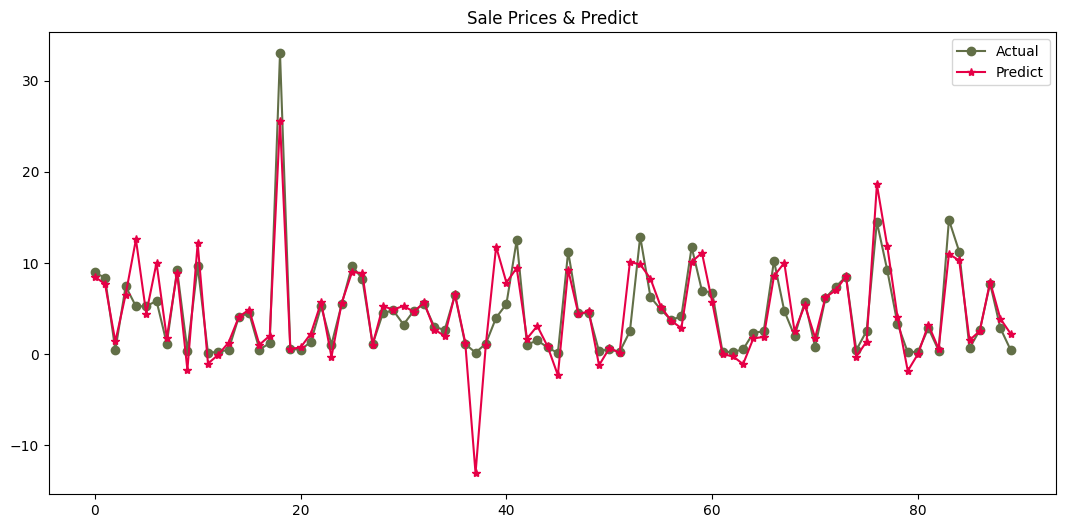

In [109]:
# New train size
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)


print()
print("----------------Outlier----------------")
print()


for i in X_train.columns:
    q1 = X_train[i].quantile(0.10) 
    q3 = X_train[i].quantile(0.90)

    ıqr = q3 - q1 

    lower_border = q1 - 1.5 * ıqr
    upper_border = q3 + 1.5 * ıqr

    X_train = X_train[(X_train[i] >= lower_border) & (X_train[i] <= upper_border)]
    y_train = y_train.loc[X_train.index]



print()
print("----------------Scaling----------------")
print()
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# convert  np array data to df

X_train_scaler = pd.DataFrame(X_train_scaler , columns=X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler , columns=X_test.columns)


model = LinearRegression()

cross_val = cross_val_score(model, X_train_scaler, y_train, cv=5)

# training
model.fit(X_train_scaler , y_train)
# predict 
y_pred = model.predict(X_test_scaler)


print("--------------- Intercept & Coef ---------------")
print("Intercept:", model.intercept_)
print("Coef:", model.coef_)
print("")


print("------------ Predicts Metrics ------------")
print("Mean Squared Error:",round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error:",round(mean_absolute_error(y_test, y_pred),2))
print("Root Mean Squared Error:",round( np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 Score:", round(r2_score(y_test, y_pred),2)*100)
print("")

print("-------------- Sale Prices & Predict -------------")

index = np.arange(len(y_test))

fig, ax = plt.subplots(figsize=(13,6))
ax.plot(index, y_test, label="Actual", marker="o", markersize=6, color="#626F47")
ax.plot(index, y_pred, label="Predict", marker="*", markersize=6, color="#E50046")

plt.title("Sale Prices & Predict")
plt.legend()
plt.show()




* **Pipeline**

-------------------- Model --------------------
Cross Validation Scores: [0.87162655 0.76314    0.90395717 0.87675945 0.91311375]
Mean CV Score: 0.8657193838330111
--------------- Intercept & Coef ---------------
Intercept: 4.608277511961723
Coef: [ 3.97008685 -0.25991461 -0.44357475 -0.6303147  -0.6119416   0.13040501
 -0.98411469]

------------ Predicts Metrics ------------

Mean Squared Error: 5.41
Mean Absolute Error: 1.42
Root Mean Squared Error: 2.33
R2 Score: 77.0


------------ Sale Prices & Predict ------------


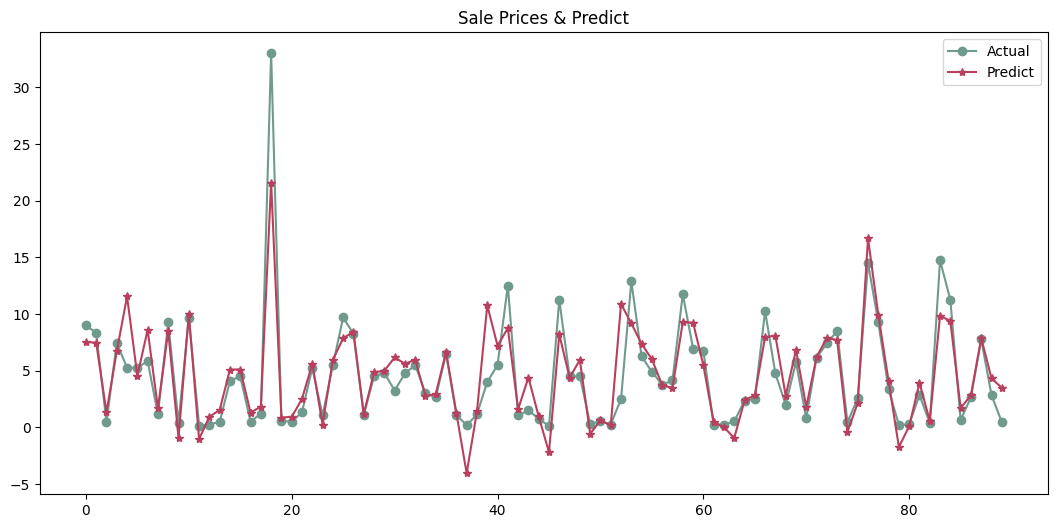

In [110]:
y = car_data["Selling_Price"]
X = car_data.drop("Selling_Price" , axis=1)


# train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.pipeline import Pipeline
# Pipeline (StandardScaler + LinearRegression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', LinearRegression())
])

# Cross-validation 
cross_val = cross_val_score(pipeline, X_train, y_train, cv=5)

print("-------------------- Model --------------------")
print(f"Cross Validation Scores: {cross_val}")
print(f"Mean CV Score: {cross_val.mean()}")

# Model
pipeline.fit(X_train, y_train)

# Prediction
y_pred = pipeline.predict(X_test)

# Intercept ve Coef 
model = pipeline.named_steps['model']

print("--------------- Intercept & Coef ---------------")
print("Intercept:", model.intercept_)
print("Coef:", model.coef_)
print("")

print("------------ Predicts Metrics ------------")
print("Mean Squared Error:",round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error:",round(mean_absolute_error(y_test, y_pred),2))
print("Root Mean Squared Error:",round( np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 Score:", round(r2_score(y_test, y_pred),2)*100)
print("")

print("------------ Sale Prices & Predict ------------")

index = np.arange(len(y_test))

fig, ax = plt.subplots(figsize=(13,6))
ax.plot(index, y_test, label="Actual", marker="o", markersize=6, color="#6F9A8D")
ax.plot(index, y_pred, label="Predict", marker="*", markersize=6, color="#B8405E")

plt.title("Sale Prices & Predict")
plt.legend()
plt.show()

#### New Columns

In [111]:
pd.concat({"Columns" : car_data.apply(pd.unique) ,
             "Values" : car_data.nunique()} , axis=1)

,Columns,Values
Selling_Price,"[3.35, 4.75, 7.25, 2.85, 4.6, 9.25, 6.75, 6.5,...",156
Present_Price,"[5.59, 9.54, 9.85, 4.15, 6.87, 9.83, 8.12, 8.6...",147
Km,"[27000, 43000, 6900, 5200, 42450, 2071, 18796,...",206
Fuel_Type,"[2, 1, 0]",3
Seller_Type,"[0, 1]",2
Transmission,"[1, 0]",2
Owner,"[0, 1, 3]",3
Age,"[11, 12, 8, 14, 7, 10, 9, 16, 15, 13, 22, 17, ...",16


<Axes: >

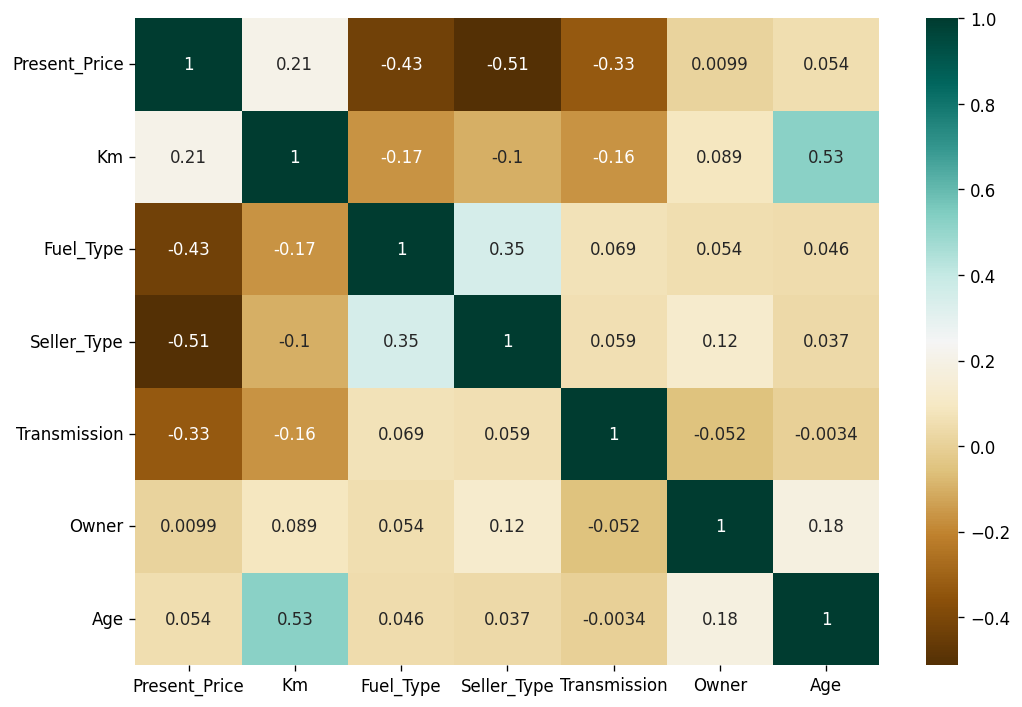

In [112]:
plt.figure(figsize=(10,7) , dpi=120)
sns.heatmap(X.corr() , annot=True , cmap="BrBG")

In [113]:
X.head(5)

,Present_Price,Km,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,2,0,1,0,11
1,9.54,43000,1,0,1,0,12
2,9.85,6900,2,0,1,0,8
3,4.15,5200,2,0,1,0,14
4,6.87,42450,1,0,1,0,11


In [114]:
X["Persent_Transmis"] = X["Present_Price"] * X["Transmission"] # -0.33 corr
X["Present_Seller"] = X["Present_Price"] * X["Seller_Type"] # -0.51 corr
X["Present_Fuel"] = X["Present_Price"] * X["Fuel_Type"] # -0.43 corr

X["Present_Km"] = X["Present_Price"] * (X["Km"] **2 ) # 0.21 corr
X["Km_Age"] = X["Km"] * (X["Age"] ** 2) # 0.53 corr
X["Fuel_Saller"] = X["Fuel_Type"] * (X["Seller_Type"] ** 2) # 0.35 corr

In [115]:
X.head(5)

,Present_Price,Km,Fuel_Type,Seller_Type,Transmission,Owner,Age,Persent_Transmis,Present_Seller,Present_Fuel,Present_Km,Km_Age,Fuel_Saller
0,5.59,27000,2,0,1,0,11,5.59,0.0,11.18,4.075110e+09,3267000,0
1,9.54,43000,1,0,1,0,12,9.54,0.0,9.54,1.763946e+10,6192000,0
2,9.85,6900,2,0,1,0,8,9.85,0.0,19.70,4.689585e+08,441600,0
3,4.15,5200,2,0,1,0,14,4.15,0.0,8.30,1.122160e+08,1019200,0
4,6.87,42450,1,0,1,0,11,6.87,0.0,6.87,1.237976e+10,5136450,0


In [116]:
# IQR 
q1 = X.quantile(0.05)
q3 = X.quantile(0.95)
iqr = q3 - q1

# lover & upper border
lower_border = q1 - 1.5 * iqr
upper_border = q3 + 1.5 * iqr

# filter
mask = (X >= lower_border) & (X <= upper_border)
X = X[mask.all(axis=1)]
y = y.loc[X.index]  

# Reset Index
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)


--------------- Intercept & Coef ---------------
Intercept: 4.642072538860103
Coef: [ 6.00118419e+00  9.92762542e-02 -3.03874929e-02 -6.27862711e-02
 -7.63013672e-02  2.49800181e-15 -1.18568501e+00 -1.88109803e-01
 -7.72738019e-02 -1.10647903e+00 -1.87406399e+00  7.04214314e-01
 -6.27862711e-02]

------------ Predicts Metrics ------------
Mean Squared Error: 1.03
Mean Absolute Error: 0.77
Root Mean Squared Error: 1.01
R2 Score: 94.0


------------ Sale Prices & Predict ------------


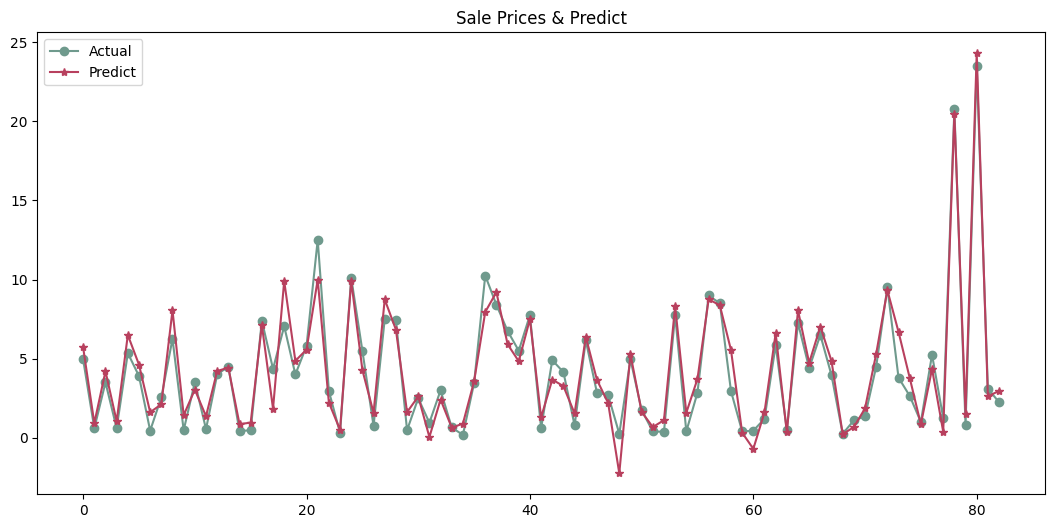

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.pipeline import Pipeline
# Pipeline (StandardScaler + LinearRegression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', LinearRegression())
])

# Cross-validation 
cross_val = cross_val_score(pipeline, X_train, y_train, cv=5)

# Model
pipeline.fit(X_train, y_train)

# Prediction
y_pred = pipeline.predict(X_test)

# Intercept ve Coef 
model = pipeline.named_steps['model']

print("--------------- Intercept & Coef ---------------")
print("Intercept:", model.intercept_)
print("Coef:", model.coef_)
print("")

print("------------ Predicts Metrics ------------")
print("Mean Squared Error:",round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error:",round(mean_absolute_error(y_test, y_pred),2))
print("Root Mean Squared Error:",round( np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 Score:", round(r2_score(y_test, y_pred),2)*100)
print("")

print("------------ Sale Prices & Predict ------------")

index = np.arange(len(y_test))

fig, ax = plt.subplots(figsize=(13,6))
ax.plot(index, y_test, label="Actual", marker="o", markersize=6, color="#6F9A8D")
ax.plot(index, y_pred, label="Predict", marker="*", markersize=6, color="#B8405E")

plt.title("Sale Prices & Predict")
plt.legend()
plt.show()

#### Overfitting Control

In [118]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Mean Cross-Validation Score: {round(cv_scores.mean(),4)}")


Mean Cross-Validation Score: 0.932


In [119]:
y_train_pred = pipeline.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

test_error = mean_squared_error(y_test, y_pred)

print(f"Train Error: {round(train_error,4)}")
print(f"Test Error: {round(test_error,4)}")


Train Error: 1.1626
Test Error: 1.0292


* **Ridge Model**

--------------- Intercept & Coef ---------------
Intercept: 4.642072538860103
Coef: [ 5.43057405  0.08538034 -0.28740922 -0.03329272 -0.0821545   0.
 -1.1238427  -0.22962773 -0.0882251  -0.54811789 -1.85834549  0.6348941
 -0.03329272]

------------ Predicts Metrics ------------

Mean Squared Error: 1.06
Mean Absolute Error: 0.77
Root Mean Squared Error: 1.03
R2 Score: 94.0

------------ Sale Prices & Predict ------------


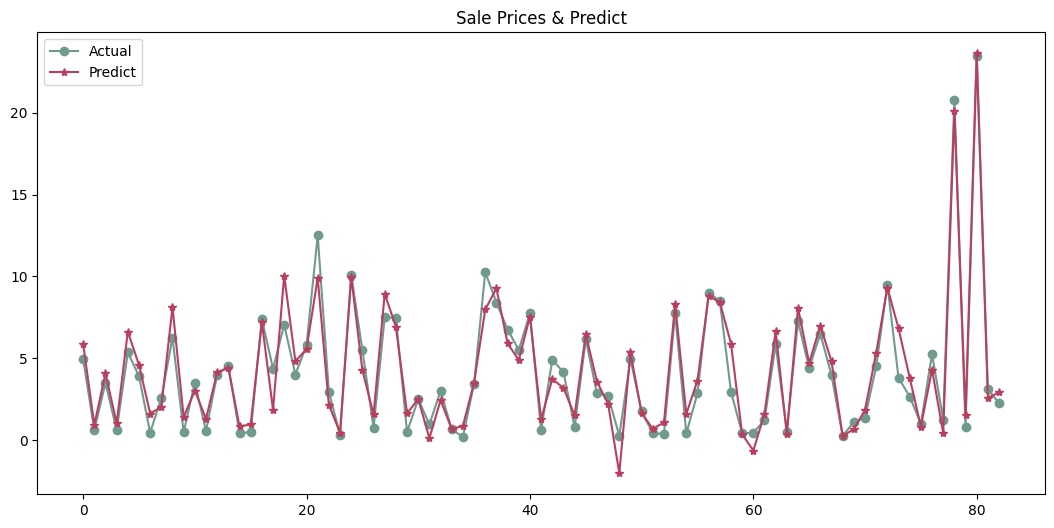

In [120]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0)) 
])


cross_val = cross_val_score(pipeline, X_train, y_train, cv=5)


# Model
pipeline.fit(X_train, y_train)

# Prediction
y_pred = pipeline.predict(X_test)

# Intercept ve Coef 
model = pipeline.named_steps['model']

print("--------------- Intercept & Coef ---------------")
print("Intercept:", model.intercept_)
print("Coef:", model.coef_)
print("")

print("------------ Predicts Metrics ------------\n")
print("Mean Squared Error:",round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error:",round(mean_absolute_error(y_test, y_pred),2))
print("Root Mean Squared Error:",round( np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 Score:", round(r2_score(y_test, y_pred),2)*100)
print("")

print("------------ Sale Prices & Predict ------------")

index = np.arange(len(y_test))

fig, ax = plt.subplots(figsize=(13,6))
ax.plot(index, y_test, label="Actual", marker="o", markersize=6, color="#6F9A8D")
ax.plot(index, y_pred, label="Predict", marker="*", markersize=6, color="#B8405E")

plt.title("Sale Prices & Predict")
plt.legend()
plt.show()

In [121]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Mean Cross-Validation Score: {round(cv_scores.mean(),4)}")

Mean Cross-Validation Score: 0.932


In [122]:
y_train_pred = pipeline.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

test_error = mean_squared_error(y_test, y_pred)

print(f"Train Error: {round(train_error,4)}")
print(f"Test Error: {round(test_error,4)}")

Train Error: 1.1806
Test Error: 1.063


* **Actual & Predict Values**

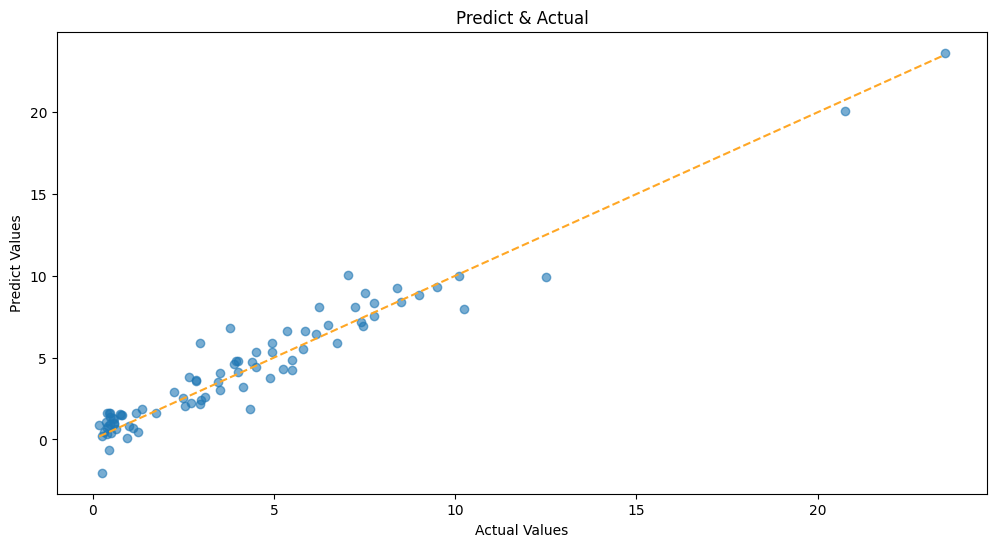

In [123]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--" , color = "#FFA725")  
plt.xlabel("Actual Values")
plt.ylabel("Predict Values")
plt.title("Predict & Actual")
plt.show()


In [124]:
result = pd.DataFrame({
    'Actual Values': y_test,
    'Predict Values': y_pred
})

result


,Actual Values,Predict Values
30,4.95,5.870617
124,0.60,0.923189
196,3.50,4.080355
127,0.60,1.017751
216,5.35,6.621990
...,...,...
82,20.75,20.103115
113,0.80,1.511286
55,23.50,23.636170
186,3.10,2.568720
